In [11]:
#########################################################
# imports

import numpy as np
import matplotlib.pyplot as plt
import ehtim as eh
import ehtim.scattering as so

#########################################################
# inputs

Npix1D = 256        # number of pixels along each axis
fov = 100.0         # field of view, in arcseconds
ra = 18.5           # right ascension, in hours
dec = 39.5          # declination, in degrees
source = 'ELyr'     # source name

seed = 12345        # random number seed

#########################################################
# bookkeeping items

np.random.seed(seed)

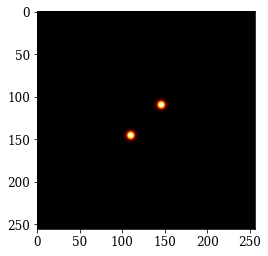

In [12]:
# initialize empty image
im = eh.image.make_empty(Npix1D, fov*eh.RADPERUAS, ra=ra, dec=dec, source=source)

# add in a fake source
im = im.add_gauss(1.0,beamparams=[3.0*eh.RADPERUAS,3.0*eh.RADPERUAS,45.0*eh.DEGREE,-7.0*eh.RADPERUAS,7.0*eh.RADPERUAS])
im = im.add_gauss(1.0,beamparams=[3.0*eh.RADPERUAS,3.0*eh.RADPERUAS,45.0*eh.DEGREE,7.0*eh.RADPERUAS,-7.0*eh.RADPERUAS])

# display original image
disp1 = im.display(label_type=None,has_title=False, has_cbar=False)

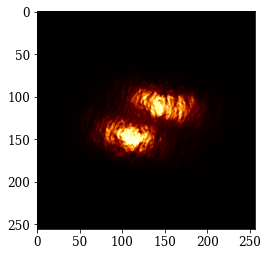

In [13]:
# generate scattering screen FT
rngseed = np.random.randint(0,100000)
ep = so.MakeEpsilonScreen(im.xdim, im.ydim, rngseed=rngseed)

# generate phase screen instantiation
theta_maj_mas_ref = np.abs(np.random.normal(1.38,0.3))
theta_min_mas_ref = np.abs(np.random.normal(0.703,0.15))
POS_ANG = np.random.uniform(0.0,180.0)
sm = so.ScatteringModel(theta_maj_mas_ref=theta_maj_mas_ref, theta_min_mas_ref=theta_min_mas_ref, POS_ANG=POS_ANG)
phase_screen = sm.MakePhaseScreen(ep,im)

# scatter the image
im = sm.Scatter(im,ep)

# display the scattered image
disp2 = im.display(label_type=None,has_title=False, has_cbar=False)

In [14]:
# save scattered image
im.save_fits('output.fits')